In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
date_format = mdates.DateFormatter('%d %b')

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# PHE covid-19 data

https://coronavirus.data.gov.uk
    
Source: Cases data from Public Health England at XX BST 8 May 2020

## Import data in original long format

In [3]:
uk_cases = pd.read_csv('data/phe/coronavirus-cases_latest.csv', parse_dates=['Specimen date'])
uk_cases.head()

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
0,England,E92000001,Nation,2020-06-08,11.0,0.0,11.0,155651,155000.0,651.0,278.1
1,South West,E12000009,Region,2020-06-08,1.0,NaN,NaN,7852,NaN,NaN,140.2
2,South East,E12000008,Region,2020-06-08,1.0,NaN,NaN,22090,NaN,NaN,241.9
3,London,E12000007,Region,2020-06-08,0.0,NaN,NaN,27194,NaN,NaN,305.3
4,East of England,E12000006,Region,2020-06-08,0.0,NaN,NaN,14712,NaN,NaN,237.2


## Pivot the data to create a new DF with the selection we need

Preferable to selecting all as variables

In [4]:
cases_pivot = uk_cases.pivot_table(values='Daily lab-confirmed cases', 
                           index='Specimen date', columns='Area name')

In [5]:
cases_pivot.head()

Area name,Adur,Allerdale,Amber Valley,Arun,Ashfield,Ashford,Aylesbury Vale,Babergh,Barking and Dagenham,Barnet,...,Wolverhampton,Worcester,Worcestershire,Worthing,Wychavon,Wycombe,Wyre,Wyre Forest,York,Yorkshire and The Humber
Specimen date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sum columns to find the LA with most cases

In [6]:
sum_cases = uk_cases.groupby('Area name').sum()
sum_cases.head()

,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
Area name,,,,,,,
Adur,99.0,0.0,0.0,2615,0.0,0.0,4094.7
Allerdale,252.0,0.0,0.0,8555,0.0,0.0,8772.0
Amber Valley,203.0,0.0,0.0,7592,0.0,0.0,5993.4
Arun,164.0,0.0,0.0,4583,0.0,0.0,2867.4
Ashfield,244.0,0.0,0.0,9592,0.0,0.0,7543.4


## Sort column to see largest case number

In [7]:
largest_cases = sum_cases.sort_values(by='Daily lab-confirmed cases', ascending=False)
largest_cases.head(10)

,Daily lab-confirmed cases,Previously reported daily cases,Change in daily cases,Cumulative lab-confirmed cases,Previously reported cumulative cases,Change in cumulative cases,Cumulative lab-confirmed cases rate
Area name,,,,,,,
England,155651.0,155000.0,651.0,8508576,8504249.0,4327.0,15199.8
London,27194.0,0.0,0.0,1718826,0.0,0.0,19295.1
North West,26320.0,0.0,0.0,1380132,0.0,0.0,18926.3
South East,22090.0,0.0,0.0,1198392,0.0,0.0,13120.7
West Midlands,16531.0,0.0,0.0,897037,0.0,0.0,15201.6
Yorkshire and The Humber,14714.0,0.0,0.0,741761,0.0,0.0,13536.6
East of England,14712.0,0.0,0.0,764406,0.0,0.0,12326.3
North East,10390.0,0.0,0.0,540270,0.0,0.0,20327.3
East Midlands,9450.0,0.0,0.0,495930,0.0,0.0,10323.3


## Select our columns

In [9]:
selected = cases_pivot[['London', 'North West','South East', 'West Midlands', 
                        'Yorkshire and The Humber','East of England','North East',
                        'East Midlands','South West', 'England']]
selected.head(10)

Area name,London,North West,South East,West Midlands,Yorkshire and The Humber,East of England,North East,East Midlands,South West,England
Specimen date,,,,,,,,,,
2020-01-30,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2020-01-31,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-03,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,2.0,6.0
2020-02-05,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-08,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2020-02-09,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-12,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-13,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Replace Nan with 0

In [10]:
selected_final = selected.fillna(0)
selected_final

Area name,London,North West,South East,West Midlands,Yorkshire and The Humber,East of England,North East,East Midlands,South West,England
Specimen date,,,,,,,,,,
2020-01-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2020-01-31,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-03,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,6.0
2020-02-05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-02-08,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-04,18.0,71.0,54.0,49.0,23.0,95.0,14.0,35.0,17.0,388.0
2020-06-05,22.0,61.0,59.0,31.0,35.0,56.0,18.0,38.0,17.0,352.0
2020-06-06,13.0,38.0,24.0,28.0,21.0,9.0,13.0,11.0,8.0,170.0


## Plot columns to explore the data

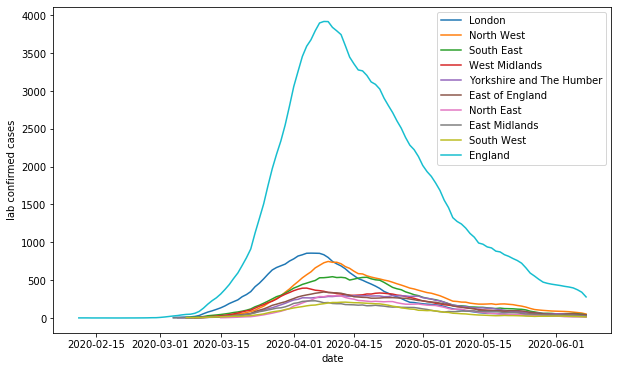

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in selected.items():
    ax.plot(value.rolling(7).mean(), label=column)

plt.ylabel('lab confirmed cases')
plt.xlabel('date')

axes = plt.gca()
plt.legend();

## Loop over columns for small multiple plots

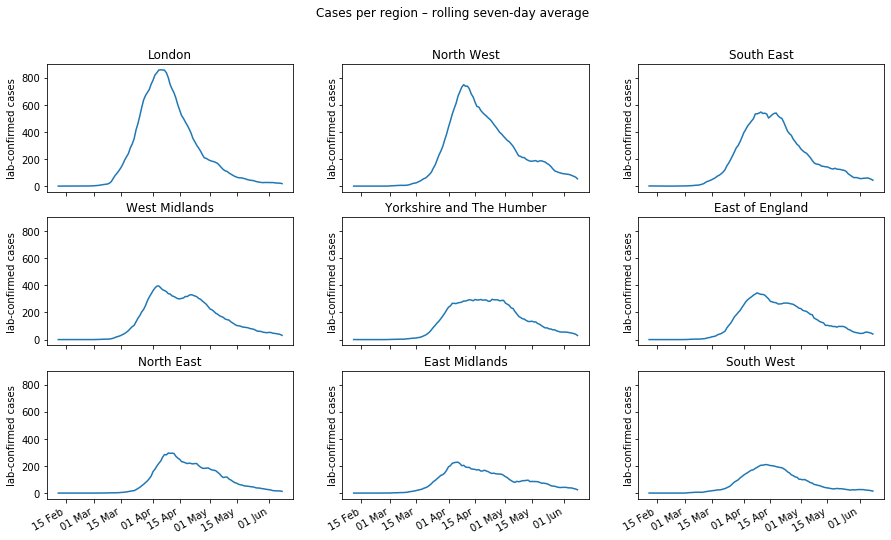

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15,8), sharex=True, sharey=True)

for ax, column in zip(ax.flat, selected_final):
    ax.plot(selected_final[column].rolling(7).mean())
    ax.xaxis.set_major_formatter(date_format)
    
    plt.sca(ax)
    ax.set_title(column)
    plt.xticks(rotation=30, ha='right')
    plt.suptitle('Cases per region – rolling seven-day average')
    plt.ylabel('seven day ave cases')
    plt.ylabel('lab-confirmed cases')
plt.show()

In [19]:
rise = cases_pivot[['Solihull', 'Colchester', 'Nottingham', 'Scarborough', 'Wigan']]
rise = rise.fillna(0)
rise.head()

Area name,Solihull,Colchester,Nottingham,Scarborough,Wigan
Specimen date,,,,,
2020-01-30,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0,0.0,0.0
2020-02-08,0.0,0.0,0.0,0.0,0.0


In [18]:
# Sum by week
week = rise[['Solihull']].resample('W').sum()
week.head()

Area name,Solihull
Specimen date,
2020-02-02,0.0
2020-02-09,0.0
2020-02-16,0.0
2020-02-23,0.0
2020-03-01,0.0


In [15]:
# uk_cases['Area name'].unique()

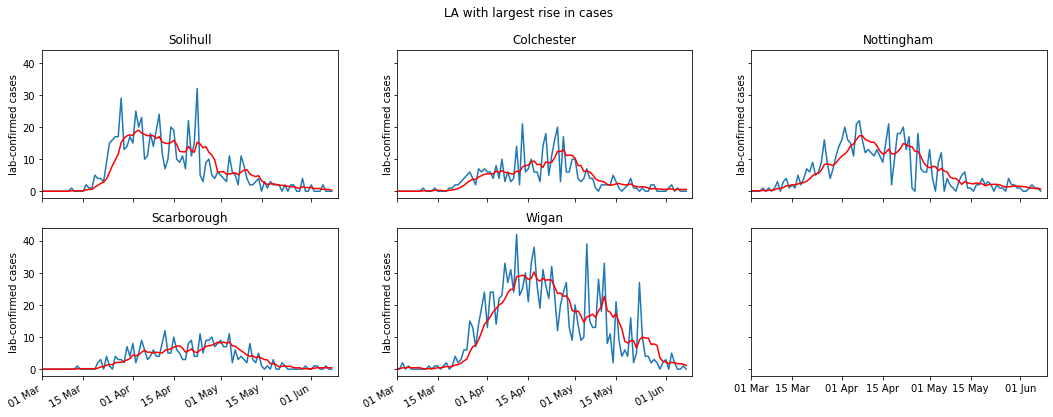

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(18,6), sharex=True, sharey=True)
# ax.bar(rise.index, rise['Solihull'])

for ax, column in zip(ax.flat, rise):
#     ax.bar(rise.index, rise[column])
    ax.set_title(column)
    ax.plot(rise.index, rise[column])
    ax.plot(rise.index, rise[column].rolling(7).mean(), c='r')
    plt.sca(ax)
    plt.xticks(rotation=30, ha='right')
    ax.set_xlim('2020-03-01', '2020-06-10')
    
    plt.suptitle('LA with largest rise in cases')
    plt.ylabel('seven day ave cases')
    plt.ylabel('lab-confirmed cases')
    

    
    ax.xaxis.set_major_formatter(date_format)
    
    
plt.show()

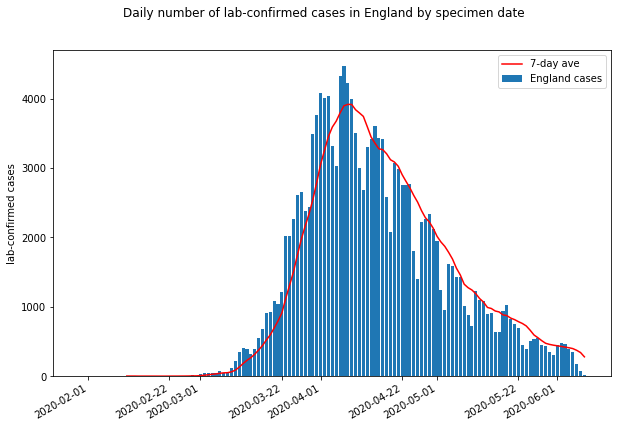

In [33]:
## Plot England cases
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(selected_final.index, selected_final['England'], label='England cases')
ax.plot(selected_final['England'].rolling(7).mean(), c='r', label='7-day ave')

plt.xticks(rotation=30, ha='right')
# ax.set_xlim('2020-03-01', '2020-06-10')

plt.legend()
plt.suptitle('Daily number of lab-confirmed cases in England by specimen date')
plt.ylabel('seven day ave cases')
plt.ylabel('lab-confirmed cases')

plt.savefig('output/phe/Daily number of lab-confirmed cases in England.pdf')




In [43]:
england_cases = selected_final[['England']]
england_cases['rolling_ave'] = selected_final[['England']].rolling(7).mean()
england_cases.head()
england_cases.to_csv('data/phe/phe_output.csv')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Import deaths

In [56]:
uk_deaths = pd.read_csv('data/phe/coronavirus-deaths_latest.csv', parse_dates=['Reporting date'], index_col=3)
uk_deaths.head()

,Area name,Area code,Area type,Daily change in deaths,Cumulative deaths
Reporting date,,,,,
2020-06-09,Wales,W92000004,Nation,9.0,1410
2020-06-09,Scotland,S92000003,Nation,0.0,2415
2020-06-09,Northern Ireland,N92000002,Nation,0.0,537
2020-06-09,United Kingdom,K02000001,UK,286.0,40883
2020-06-09,England,E92000001,Nation,277.0,36521


## Pivot to wide format

In [60]:
deaths_pivot = uk_deaths.pivot_table(values='Daily change in deaths', 
                           index='Reporting date', columns='Area name')
deaths_pivot.to_csv('data/phe/uk_deaths.csv')

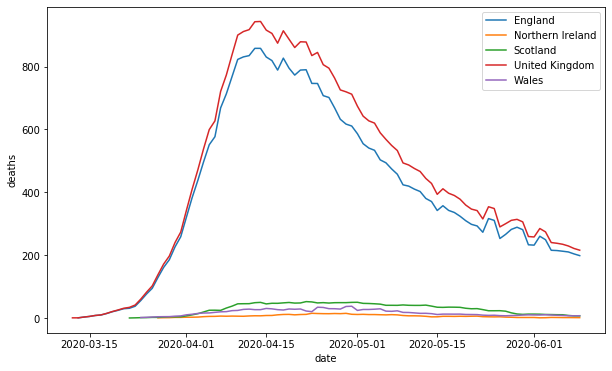

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))

for column, value in deaths_pivot.items():
    ax.plot(value.rolling(7).mean(), label=column)

plt.ylabel('deaths')
plt.xlabel('date')

axes = plt.gca()
plt.legend();